In [1]:
from pymatgen.ext.matproj import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.kpath import KPathBase
from pymatgen.symmetry.bandstructure import HighSymmKpath
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
with MPRester("6J45krBxKRTOXQdg") as m:
    struct = m.get_structure_by_material_id("mp-777047")
    band_struct = m.get_bandstructure_by_material_id("mp-777047")

## Bande Interdite

Informations sur la bande interdite :  {'direct': False, 'energy': 4.6182, 'transition': '(0.090,0.000,-0.090)-(0.500,0.500,0.000)'} 

La bande interdite a un gap indirect et une énergie de 4.6182 eV.


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

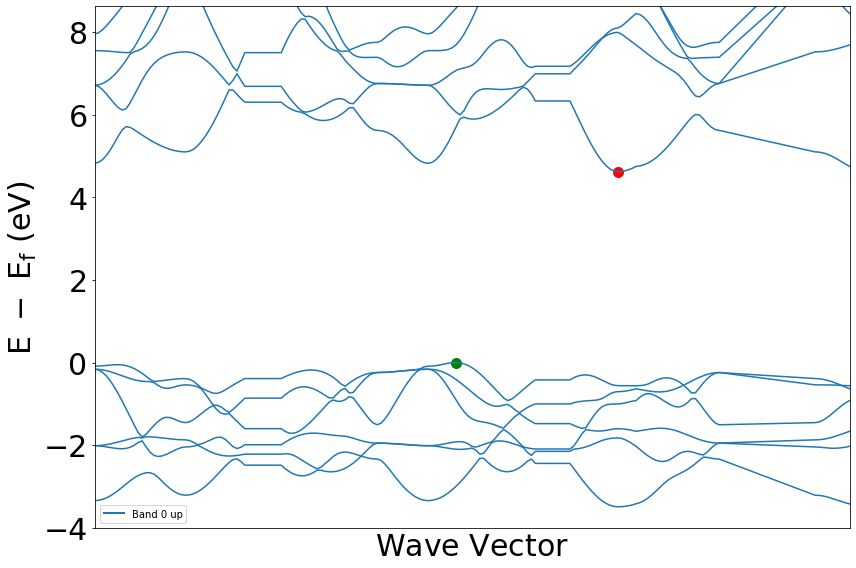

In [3]:
band_gap = band_struct.get_band_gap()
print("Informations sur la bande interdite : ",band_gap,"\n")
print("La bande interdite a un gap indirect et une énergie de 4.6182 eV.")
bsplotter = BSPlotter(band_struct)
bsplotter.get_plot(vbm_cbm_marker = True)

## Directions de dispersion
La dispertion est définie comme la variation d'énergie par rapport à la distance dans une certaine direction. Pour trouver les directions où il y a le plus et le moins de dispersion, on a besoin de connaitre le niveau d'énergie des différents points de la bande de valence et de conduction ainsi que la distance entre ces points. On commence par déterminer les coordonnées des points.

In [4]:
bands = list(band_struct.bands.values())[0]

In [5]:
#on détermine les coordonnées des différents points

path = HighSymmKpath(struct)
points = path.kpath['kpoints']
points_labels = ['\\Gamma', 'L', 'B', 'Z', '\\Gamma', 'X', 'F', 'P_1', 'Z', 'P']

coords = [0,1.46,2.32,3.87,4.64,6.3,7.07,7.35,8.62,9.2] #la commande bsplotter.bs_plot_data().get('ticks') renvoie une liste de ticks vide , j'ai donc été chercher les corrdonnées des points directement sur le materials project
dist = [] #distance entre chaque point
for i in range(len(points_labels)-1):
    dist.append(coords[i+1]-coords[i])

/usr/local/lib64/python3.6/site-packages/pymatgen/symmetry/kpath.py:173: UserWarning:

'magmom' entry found in site properties but will be ignored                   for the Setyawan and Curtarolo convention.



On détermine ensuite l'énergie des points dans la bande de valence et de conduction ce qui permet de déterminer la dispertion minimale et maximale. 

In [6]:
#on cherche l'énergie des points dans la bande de valence

vb = bands[11]
val_e = {}
for label in points_labels:
    not_found = True
    j=0
    while not_found:
        kpoint = band_struct.kpoints[j].frac_coords
        if np.array_equal(np.round(kpoint,7), np.round(points[label],7)):
            val_e[label] = vb[j]
            not_found = False
        j+=1

In [7]:
#on détermine les écarts d'énergies dans la bande de valence pour chaque intervalle

disp_val = []
for i in range(len(points_labels)-1):
    disp_val.append((abs(val_e[points_labels[i]] - val_e[points_labels[i+1]]))/dist[i])
disp_val = np.array(disp_val)

max_disp_v = max(disp_val)
min_disp_v = min(disp_val)
print("Dispertion dans chaque interval de la bande de valence: ",disp_val)
print("La dispertions maximale dans le bande de valence a lieu dans la direction Z|L -> P et vaut", max_disp_v)
print("La dispertions minimale dans la bande de valence a lieu dans la direction L -> B_1|B et vaut", min_disp_v)

Dispertion dans chaque interval de la bande de valence:  [0.2059589  0.00116279 0.09432258 0.19935065 0.20060241 0.17987013
 0.00714286 0.2519685  0.55172414]
La dispertions maximale dans le bande de valence a lieu dans la direction Z|L -> P et vaut 0.5517241379310345
La dispertions minimale dans la bande de valence a lieu dans la direction L -> B_1|B et vaut 0.0011627906976744199


In [8]:
#on cherche l'énergie des points dans la bande de conduction

cb = bands[12]
cond_e = {}

for label in points_labels:
    not_found = True
    j=0
    while not_found:
        kpoint = band_struct.kpoints[j].frac_coords
        if np.array_equal(np.round(kpoint,7), np.round(points[label],7)):
            cond_e[label] = cb[j]
            not_found = False
        j+=1

In [9]:
#on détermine les écarts d'énergies dans la bande de conduction pour chaque intervalle et ainsi les dipertions max et min

disp_cond = []
for i in range(len(points_labels)-1):
    disp_cond.append((abs(cond_e[points_labels[i]] - cond_e[points_labels[i+1]]))/dist[i])
disp_cond = np.array(disp_cond) 

max_disp_c = max(disp_cond)
min_disp_c = min(disp_cond)
print("Dispertion dans chaque interval de la bande de conduction: ", disp_cond)
print("La dispertions maximale dans la bande de conduction a lieu dans la direction X|Q -> F et vaut", max_disp_c)
print("La dispertions minimale dans la bande de conduction a lieu dans la direction Gamma -> L et vaut", min_disp_c)

Dispertion dans chaque interval de la bande de conduction:  [0.18863014 1.39802326 0.44051613 1.03233766 0.90849398 2.22298701
 0.45392857 0.68614173 1.50241379]
La dispertions maximale dans la bande de conduction a lieu dans la direction X|Q -> F et vaut 2.222987012987012
La dispertions minimale dans la bande de conduction a lieu dans la direction Gamma -> L et vaut 0.1886301369863016


Pour la figure de dispersion, les différents points ne s'affichent pas comme ils le devraient et je n'ai pas réussi à résoudre le problème les directions de dispertions sont donc moins visibles (ils devraient pourtant s'afficher simplement avec l'instructions bsplotter.get_plot, la liste des ticks donnée par bsplotter.bs_plot_data().get('ticks') est également vide, alors qu'ils sont bien présents sur le site du materials project).

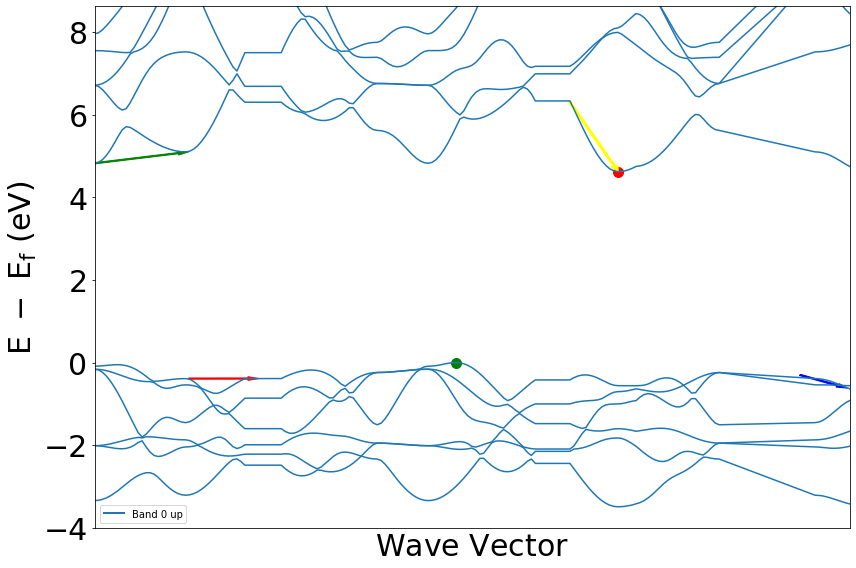

In [10]:
bsplotter.get_plot(vbm_cbm_marker=True)
#Flèche pour la plus grande dispersion de la dernière bande de valence
plt.arrow(8.62,-0.3,0.58,-0.319986, width = 0.03,length_includes_head = True, color = 'blue')
#Flèche pour la plus petite dispersion de la dernière bande de valence
plt.arrow(1.15,-0.389,0.8596,0.001, width = 0.03,length_includes_head = True, color = 'red')
#Flèche pour la plus grande dispersion de la première bande de conduction
plt.arrow(5.8,6.33,0.6,-1.71, width = 0.03,length_includes_head = True, color = 'yellow')
#Flèche pour la plus petite dispersion de la première bande de conduction
plt.arrow(0,4.822,1.15,0.2754, width = 0.03,length_includes_head = True, color = 'green')

## Calcul des masses effectives
La masse effective peut être définie comme la masse de la particule due au potentiel qui lui est appliqué. Elle peut être exprimée comme suit : 
$$m^* = \frac{\hbar^2}{\frac{\partial^2\epsilon}{\partial k^2}}$$
avec $\hbar$ la constante de Planck et k le vecteur d'onde.
On cherche donc la dérivée seconde de l'énergie par rapport au vecteur d'onde autour du point pour lequel on recherche la masse effective. La dispersion étant supposée parabolique, on peut écrire l'énergie comme
$$\epsilon = a * k^2 + b * k + c$$
En interpolant l'énergie autour du maximum de la bande de valence (ou du minimum de la bande de conduction), on peut trouver la valeur de $${\frac{\partial^2\epsilon}{\partial k^2}}$$ et ainsi trouver la masse effective. 

N'ayant pas réussi à interpoler la fonction pour l'énergie, je n'ai pas trouvé de valeur finale pour la masse effective.